
# **Car Price Prediction::**
Download dataset from this link:

https://www.kaggle.com/hellbuoy/car-price-prediction

# Problem Statement:: 
A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

Which variables are significant in predicting the price of a car How well those variables describe the price of a car Based on various market surveys, the consulting firm has gathered a large data set of different types of cars across the America market.

task::
We are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

# **WORKFLOW ::**
1.Load Data

2.Check Missing Values ( If Exist ; Fill each record with mean of its feature )

3.Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).

4.Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).

5.Compilation Step (Note : Its a Regression problem , select loss , metrics according to it) 6.Train the Model with Epochs (100) and validate it

7.If the model gets overfit tune your model by changing the units , No. of layers , activation function , epochs , add dropout layer or add Regularizer according to the need .

8.Evaluation Step

9.Prediction

In [ ]:
cd ./drive/MyDrive/Deep_learning_assignment


/content/drive/MyDrive/Deep_learning_assignment


In [ ]:
ls


 CarPrice_Assignment.csv                         Flowers_Recognition.ipynb
 Car_Price_Prediction_assignment_final.ipynb    'Ionosphere Assignment.ipynb'
'Concrete Strength Assignment.ipynb'             README.md
'Credit Card Fraud Detection assignment.ipynb'   train-data.csv
'Data Dictionary - carprices.xlsx'               Untitled


In [ ]:
import pandas as pd
import numpy as np
car_data=pd.read_csv('CarPrice_Assignment.csv')


In [ ]:
import tensorflow as tf


In [ ]:
car_data

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [ ]:
car_data.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [ ]:
car_data.iloc[3,2]='audi 100ls'	

In [ ]:
car_data.drop(columns=['car_ID'], inplace=True)

In [ ]:
car_data.columns

Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [ ]:
car_data.dtypes

symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [ ]:
np.where(car_data.applymap(lambda x:x==''))

(array([], dtype=int64), array([], dtype=int64))

In [ ]:
car_data.isnull().any()

symboling           False
CarName             False
fueltype            False
aspiration          False
doornumber          False
carbody             False
drivewheel          False
enginelocation      False
wheelbase           False
carlength           False
carwidth            False
carheight           False
curbweight          False
enginetype          False
cylindernumber      False
enginesize          False
fuelsystem          False
boreratio           False
stroke              False
compressionratio    False
horsepower          False
peakrpm             False
citympg             False
highwaympg          False
price               False
dtype: bool

In [ ]:
final_data=pd.get_dummies(car_data,columns=['CarName','symboling','fueltype','aspiration'	,'doornumber'		
,'carbody'		
,'drivewheel'			
,'enginelocation'			
,'enginetype'			
,'cylindernumber'		
,'fuelsystem'					
])


In [ ]:
final_data.head(10)


,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarName_Nissan versa,CarName_alfa-romero Quadrifoglio,CarName_alfa-romero giulia,CarName_alfa-romero stelvio,CarName_audi 100ls,CarName_audi 4000,CarName_audi 5000,CarName_audi 5000s (diesel),CarName_audi fox,CarName_bmw 320i,CarName_bmw x1,CarName_bmw x3,CarName_bmw x4,CarName_bmw x5,CarName_bmw z4,CarName_buick century,CarName_buick century luxus (sw),CarName_buick century special,CarName_buick electra 225 custom,CarName_buick opel isuzu deluxe,CarName_buick regal sport coupe (turbo),CarName_buick skyhawk,CarName_buick skylark,CarName_chevrolet impala,CarName_chevrolet monte carlo,CarName_chevrolet vega 2300,...,symboling_2,symboling_3,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginelocation_front,enginelocation_rear,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,1,0,0,1,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,1,0,0,1,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,1,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
5,99.8,177.3,66.3,53.1,2507,136,3.19,3.40,8.5,110,5500,19,25,15250.000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
6,105.8,192.7,71.4,55.7,2844,136,3.19,3.40,8.5,110,5500,19,25,17710.000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
7,105.8,192.7,71.4,55.7,2954,136,3.19,3.40,8.5,110,5500,19,25,18920.000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
8,105.8,192.7,71.4,55.9,3086,131,3.13,3.40,8.3,140,5500,17,20,23875.000,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
9,99.5,178.2,67.9,52.0,3053,131,3.13,3.40,7.0,160,5500,16,22,17859.167,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
final_data.describe()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarName_Nissan versa,CarName_alfa-romero Quadrifoglio,CarName_alfa-romero giulia,CarName_alfa-romero stelvio,CarName_audi 100ls,CarName_audi 4000,CarName_audi 5000,CarName_audi 5000s (diesel),CarName_audi fox,CarName_bmw 320i,CarName_bmw x1,CarName_bmw x3,CarName_bmw x4,CarName_bmw x5,CarName_bmw z4,CarName_buick century,CarName_buick century luxus (sw),CarName_buick century special,CarName_buick electra 225 custom,CarName_buick opel isuzu deluxe,CarName_buick regal sport coupe (turbo),CarName_buick skyhawk,CarName_buick skylark,CarName_chevrolet impala,CarName_chevrolet monte carlo,CarName_chevrolet vega 2300,...,symboling_2,symboling_3,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginelocation_front,enginelocation_rear,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,...,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571,0.004878,0.004878,0.004878,0.004878,0.014634,0.004878,0.004878,0.004878,0.004878,0.009756,0.004878,0.009756,0.004878,0.004878,0.004878,0.004878,0.004878,0.004878,0.004878,0.004878,0.004878,0.004878,0.004878,0.004878,0.004878,0.004878,...,0.156098,0.131707,0.097561,0.902439,0.819512,0.180488,0.560976,0.439024,0.029268,0.039024,0.341463,0.468293,0.121951,0.043902,0.585366,0.370732,0.985366,0.014634,0.058537,0.004878,0.058537,0.721951,0.073171,0.063415,0.019512,0.024390,0.053659,0.775610,0.117073,0.004878,0.004878,0.019512,0.053659,0.321951,0.014634,0.097561,0.004878,0.458537,0.043902,0.004878
std,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332,0.069843,0.069843,0.069843,0.069843,0.120377,0.069843,0.069843,0.069843,0.069843,0.098531,0.069843,0.098531,0.069843,0.069843,0.069843,0.069843,0.069843,0.069843,0.069843,0.069843,0.069843,0.069843,0.069843,0.069843,0.069843,0.069843,...,0.363836,0.339000,0.297446,0.297446,0.385535,0.385535,0.497483,0.497483,0.168970,0.194127,0.475361,0.500215,0.328031,0.205380,0.493865,0.484183,0.120377,0.120377,0.235330,0.069843,0.235330,0.449134,0.261054,0.244304,0.138655,0.154635,0.225894,0.418201,0.322294,0.069843,0.069843,0.138655,0.225894,0.468368,0.120377,0.297446,0.069843,0.499498,0.205380,0.069843
min,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00

In [ ]:
np.random.seed(200)
mask=np.random.rand(len(final_data))<.72
train_data=final_data[mask]
test_data=final_data[~mask]


In [ ]:
print(len(train_data))
print(len(test_data))

139
66


In [ ]:
train_data.head(10)

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarName_Nissan versa,CarName_alfa-romero Quadrifoglio,CarName_alfa-romero giulia,CarName_alfa-romero stelvio,CarName_audi 100ls,CarName_audi 4000,CarName_audi 5000,CarName_audi 5000s (diesel),CarName_audi fox,CarName_bmw 320i,CarName_bmw x1,CarName_bmw x3,CarName_bmw x4,CarName_bmw x5,CarName_bmw z4,CarName_buick century,CarName_buick century luxus (sw),CarName_buick century special,CarName_buick electra 225 custom,CarName_buick opel isuzu deluxe,CarName_buick regal sport coupe (turbo),CarName_buick skyhawk,CarName_buick skylark,CarName_chevrolet impala,CarName_chevrolet monte carlo,CarName_chevrolet vega 2300,...,symboling_2,symboling_3,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginelocation_front,enginelocation_rear,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,1,0,0,1,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
5,99.8,177.3,66.3,53.1,2507,136,3.19,3.40,8.5,110,5500,19,25,15250.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
6,105.8,192.7,71.4,55.7,2844,136,3.19,3.40,8.5,110,5500,19,25,17710.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
8,105.8,192.7,71.4,55.9,3086,131,3.13,3.40,8.3,140,5500,17,20,23875.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
13,101.2,176.8,64.8,54.3,2765,164,3.31,3.19,9.0,121,4250,21,28,21105.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
15,103.5,189.0,66.9,55.7,3230,209,3.62,3.39,8.0,182,5400,16,22,30760.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
17,110.0,197.0,70.9,56.3,3505,209,3.62,3.39,8.0,182,5400,15,20,36880.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
18,88.4,141.1,60.3,53.2,1488,61,2.91,3.03,9.5,48,5100,47,53,5151.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,1,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0


In [ ]:
train_data.shape

(139, 204)

In [ ]:
train_label=train_data.loc[:,'price']
test_label=test_data.loc[:,'price']

In [ ]:
train_label

1      16500.0
2      16500.0
3      13950.0
5      15250.0
6      17710.0
        ...   
198    18420.0
200    16845.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 139, dtype: float64

In [ ]:
train_data=train_data.drop(columns=['price'])
test_data=test_data.drop(columns=['price'])

In [ ]:
train_data.shape

(139, 203)

In [ ]:
mean=train_data.iloc[:,0:13].mean(axis=0)
train_data.iloc[:,0:13]-=mean
std=train_data.iloc[:,0:13].std(axis=0)
train_data.iloc[:,0:13]/=std
test_data.iloc[:,0:13]-=mean
test_data.iloc[:,0:13]/=std

In [ ]:
mean_label=train_label.mean()
train_label-=mean_label
std_label=train_label.std()
train_label/=std_label
test_label-=mean_label
test_label/=std_label

In [ ]:
mean_label

13276.81654676259

In [ ]:
train_label

1      0.399237
2      0.399237
3      0.083383
5      0.244407
6      0.549113
         ...   
198    0.637056
200    0.441970
202    1.016700
203    1.138706
204    1.157905
Name: price, Length: 139, dtype: float64

In [ ]:
train_label.std()

0.9999999999999998

In [ ]:
std

wheelbase             6.101596
carlength            12.195550
carwidth              2.113966
carheight             2.417701
curbweight          510.849165
enginesize           41.748125
boreratio             0.268160
stroke                0.331439
compressionratio      3.969617
horsepower           36.988032
peakrpm             456.573360
citympg               6.539821
highwaympg            6.957225
dtype: float64

In [ ]:
train = np.array(train_data.iloc[:]).astype('float32')
test = np.array(train_data.iloc[:]).astype('float32')

In [ ]:
test_l=np.array(test_label.astype('float32'))

In [ ]:
train_l=np.array(train_label.astype('float32'))


In [ ]:
train.dtype

dtype('float32')

In [ ]:
test_l

array([ 0.02702511,  0.5169078 ,  0.69898814,  0.567589  ,  0.3905664 ,
        0.45187914,  0.95290965,  1.3982012 ,  3.472926  , -0.8647968 ,
       -0.83011484, -0.85463995, -0.8420058 , -0.79543287, -0.74093264,
       -0.74093264, -0.5400869 , -0.27607048,  2.8145878 , -1.0010474 ,
       -0.88956964, -0.3074081 ,  0.6197151 ,  1.5204552 ,  1.8454747 ,
        2.5896506 , -0.8779264 , -0.8184716 , -0.08024125,  0.19721445,
       -0.77883506, -0.49518615, -0.7404372 , -0.62276626,  0.1389983 ,
        0.7954783 , -0.17053822,  0.07223552,  0.44878256,  0.5788399 ,
       -0.87297183, -0.81562275, -0.7020393 ,  2.2448747 , -0.17673142,
        0.6618289 , -0.70278245, -0.68147784, -0.50088394, -0.72012347,
       -0.5572421 , -0.75294745, -0.6464243 , -0.62412876, -0.46310535,
       -0.59799343, -0.45059505, -0.40724263, -0.25736699, -0.5361852 ,
       -0.31942293, -0.20831679, -0.12223119, -0.0417195 ,  0.7027041 ,
        0.71447116], dtype=float32)

In [ ]:
from keras import regularizers
from keras import models
from keras import layers
def build_model_drop(act):
  model = models.Sequential()
  model.add(layers.Dense(10, activation= act,input_shape=(train.shape[1],)))
  model.add(layers.Dropout(0.2))
  model.add(layers.Dense(8, activation= act))
  model.add(layers.Dropout(0.2))
  model.add(layers.Dense(6, activation= act))
  model.add(layers.Dropout(0.2))
  model.add(layers.Dense(1))
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  return model

In [ ]:
build_model_drop('relu').summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                2040      
_________________________________________________________________
dropout (Dropout)            (None, 10)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 88        
_________________________________________________________________
dropout_1 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 54        
_________________________________________________________________
dropout_2 (Dropout)          (None, 6)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7

In [ ]:
#k-fold validtion with dropout
import numpy as np
k =  4
num_val_samples = len(train) // k
num_epochs = 100
all_mae_histories = []
for i in range(k):
  print('processing fold #', i)
  val_data = train[i * num_val_samples: (i + 1) * num_val_samples]
  val_targets = train_l[i * num_val_samples: (i + 1) * num_val_samples]
  partial_train_data = np.concatenate([train[:i * num_val_samples],train[(i + 1) * num_val_samples:]],  axis=0)
  # print(partial_train_data)
  partial_train_targets = np.concatenate([train_l[:i * num_val_samples],train_l[(i + 1) * num_val_samples:]],axis=0)
  model = build_model_drop('relu')
  history=model.fit(partial_train_data, partial_train_targets,epochs=num_epochs, batch_size=1, verbose=1)
  mae_history = history.history['mae']
  all_mae_histories.append(mae_history)

processing fold # 0
Epoch 1/100
105/105 [==============================] - 1s 1ms/step - loss: 1.1037 - mae: 0.7171
Epoch 2/100
105/105 [==============================] - 0s 1ms/step - loss: 0.8027 - mae: 0.5879
Epoch 3/100
105/105 [==============================] - 0s 1ms/step - loss: 0.5481 - mae: 0.4448
Epoch 4/100
105/105 [==============================] - 0s 1ms/step - loss: 0.5089 - mae: 0.4522
Epoch 5/100
105/105 [==============================] - 0s 1ms/step - loss: 0.6777 - mae: 0.4753
Epoch 6/100
105/105 [==============================] - 0s 1ms/step - loss: 0.8032 - mae: 0.5847
Epoch 7/100
105/105 [==============================] - 0s 1ms/step - loss: 0.8789 - mae: 0.5456
Epoch 8/100
105/105 [==============================] - 0s 2ms/step - loss: 0.8194 - mae: 0.5942
Epoch 9/100
105/105 [==============================] - 0s 1ms/step - loss: 0.5572 - mae: 0.4103
Epoch 10/100
105/105 [==============================] - 0s 1ms/step - loss: 0.6560 - mae: 0.5298
Epoch 11/100
105/10

In [ ]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

In [ ]:
history.history

{'loss': [1.2005527019500732,
  1.0284361839294434,
  1.007464051246643,
  0.9330569505691528,
  0.9518432021141052,
  0.9234187602996826,
  0.6246940493583679,
  0.8184446692466736,
  0.5922888517379761,
  0.5348685383796692,
  0.6350743770599365,
  0.5700667500495911,
  0.5848643779754639,
  0.7045310735702515,
  0.5834627151489258,
  0.5236119031906128,
  0.41988539695739746,
  0.42232444882392883,
  0.4454440176486969,
  0.5951796174049377,
  0.41246530413627625,
  0.528269350528717,
  0.3482168912887573,
  0.3268527090549469,
  0.33781924843788147,
  0.45274320244789124,
  0.20051109790802002,
  0.4445967972278595,
  0.5355266332626343,
  0.3095281720161438,
  0.5046164989471436,
  0.31039267778396606,
  0.6914805173873901,
  0.35024023056030273,
  0.506507396697998,
  0.46425145864486694,
  0.26009392738342285,
  0.20943096280097961,
  0.29289472103118896,
  0.42178094387054443,
  0.44331008195877075,
  0.37309515476226807,
  0.3200835883617401,
  0.4309539794921875,
  0.54311209

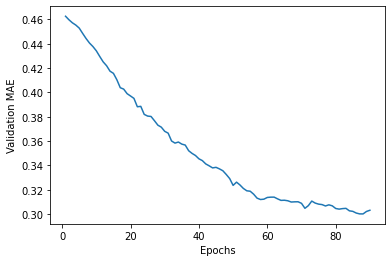

In [ ]:
import matplotlib.pyplot as plt
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
        smoothed_points.append(point)
  return smoothed_points
smooth_mae_history = smooth_curve(average_mae_history[10:])
plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [ ]:
def predict(model, m):
  print(f" the Actual value Price was : {test_label.iloc[m]* std_label + mean_label} " )
  return(f" the predicted Price was : {(model.predict(test.iloc[m:m+1].reshape(1,test.shape[1]))) * std_label + mean_label} ")


In [ ]:
test_label.iloc[2]* std_label + mean_label

18920.0

In [ ]:
x_drop = predict(model,3)
x_drop

 the Actual value Price was : 17859.167 


' the predicted Price was : [[14942.84]] '

In [ ]:
def plot_fn(mod):
  y_true = test_label* std_label + mean_label
  y_pred = mod.predict(test) * std_label + mean_label
  return y_true , y_pred.flatten()

In [ ]:

%matplotlib inline
def plotting(mod, label):
  y_true, y_pred = plot_fn(mod)
  coef = np.polyfit(y_true,y_pred,1)
  poly1d_fn = np.poly1d(coef) 
  # poly1d_fn is now a function which takes in x and returns an estimate for y
  plt.figure()
  plt.plot(y_true,y_pred, 'yo', y_true, poly1d_fn(y_true), '--k')
  plt.title(label)
  plt.xlabel('Thousand Dollar True' )
  plt.ylabel('Thousand Dollar Predictions' )
  plt.xlim(0, 50000)
  plt.ylim(0, 50000)

In [ ]:
  y_true, y_pred = plot_fn(model)
  y_true.shape
  coef = np.polyfit(y_true,y_pred,1)
  poly1d_fn = np.poly1d(coef) 
  # poly1d_fn is now a function which takes in x and returns an estimate for y
  plt.figure()
  plt.plot(y_true,y_pred, 'yo', y_true, poly1d_fn(y_true), '--k')
  plt.title('model_drop')
  plt.xlabel('Thousand Dollar True' )
  plt.ylabel('Thousand Dollar Predictions' )
  plt.xlim(0, 50000)
  plt.ylim(0, 50000)
  plt.show()

TypeError: ignored

In [ ]:
y_true, y_pred = plot_fn(model)
y_pred

array([16711.348 , 15621.912 , 13917.292 , 14942.84  , 17501.7   ,
       19677.527 , 18494.084 , 22909.348 , 27116.035 ,  6622.101 ,
        8108.675 , 10057.501 ,  8625.787 ,  8836.826 ,  8847.076 ,
       10229.388 , 10197.641 , 13371.582 ,  7861.5386,  8680.908 ,
        8704.479 ,  9856.67  ,  9906.123 , 10267.213 , 10232.408 ,
       13069.453 , 10625.105 ,  9981.613 ,  8713.248 , 27596.312 ,
       27266.176 ,  8706.57  ,  9069.455 ,  8946.131 , 11879.349 ,
       11770.023 , 13665.289 , 15453.829 , 10064.846 , 10613.128 ,
       10348.265 , 10883.72  , 10769.537 , 16418.82  , 22710.102 ,
       25419.117 , 26579.197 , 31693.994 , 33373.43  , 15432.695 ,
        8238.335 ,  9469.391 , 10990.408 , 10070.742 , 13541.235 ,
       10303.945 , 10857.433 ,  8565.264 ,  8925.63  ,  8748.635 ,
        9153.972 ,  9081.607 ,  8936.739 ,  9190.195 ,  9039.285 ,
       10321.725 , 10425.851 , 14210.253 , 14199.489 , 16925.918 ,
       16238.004 , 14314.475 , 13107.088 , 15569.711 , 15617.9